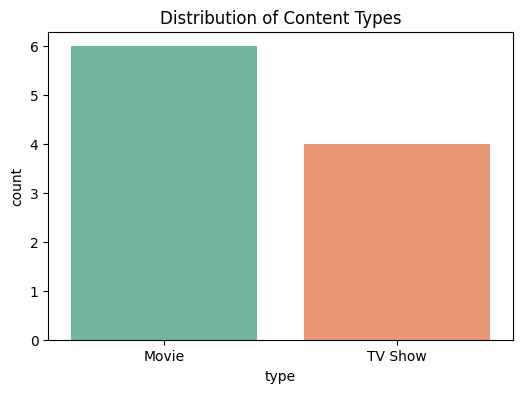

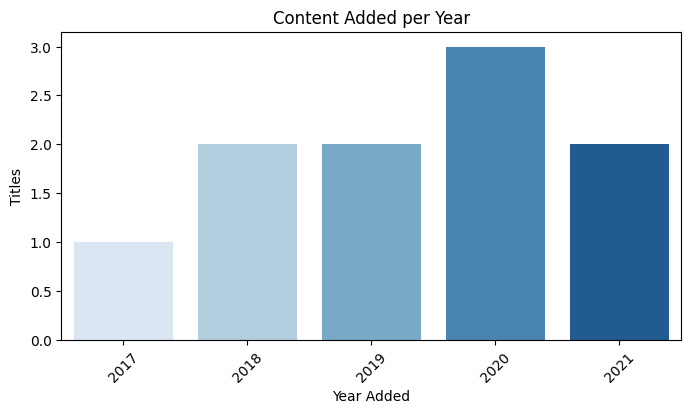

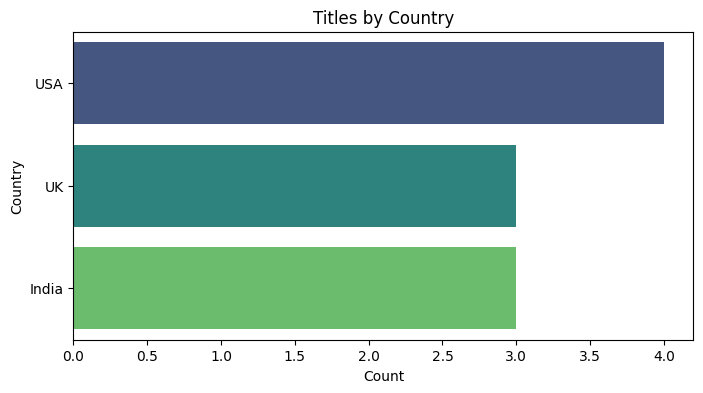

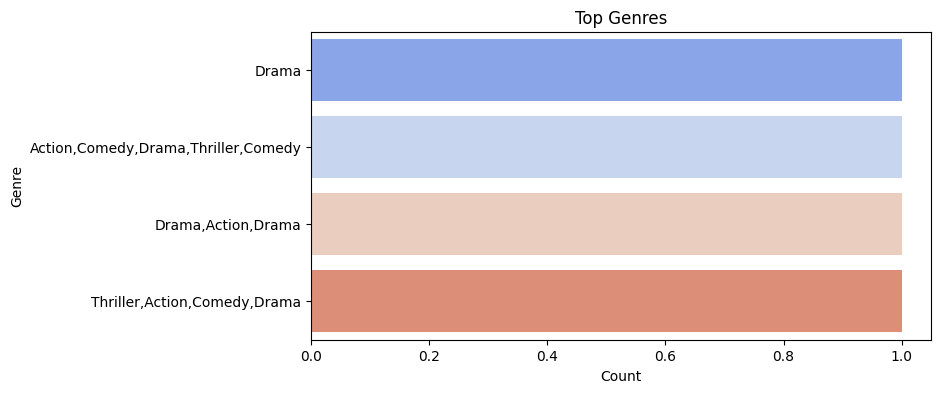

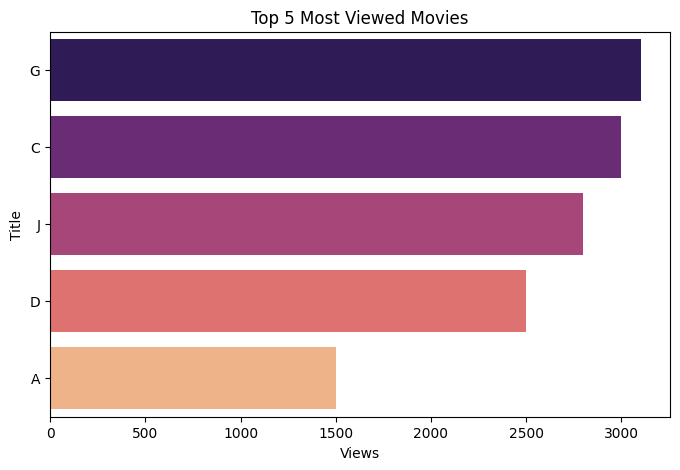

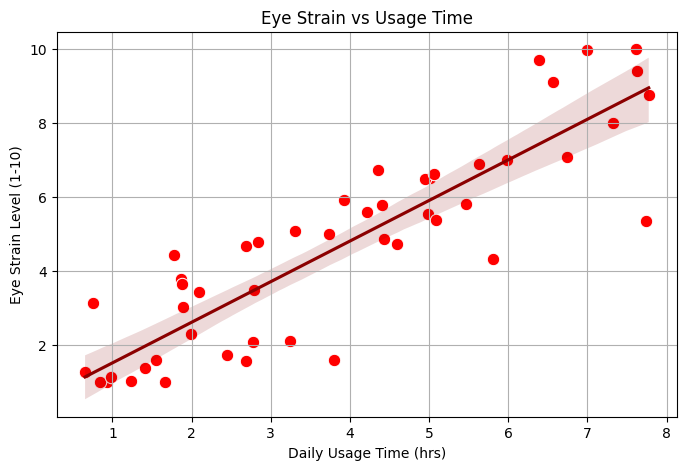

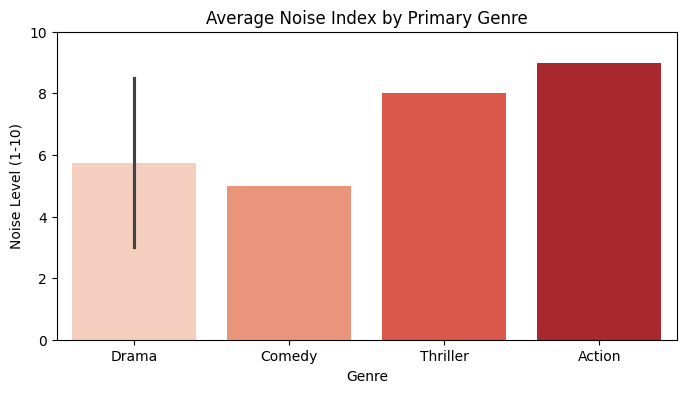

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# --- Synthetic Netflix-like data with views ---
data = {
    'show_id': ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10'],
    'type': ['Movie', 'TV Show', 'Movie', 'Movie', 'TV Show', 'TV Show', 'Movie', 'Movie', 'TV Show', 'Movie'],
    'title': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'director': ['Dir1', 'Dir2', 'Dir3', 'Dir1', 'Dir2', 'Dir3', 'Dir1', 'Dir2', 'Dir3', 'Dir1'],
    'country': ['USA', 'USA', 'UK', 'India', 'India', 'UK', 'USA', 'India', 'UK', 'USA'],
    'date added': ['2020-01-01', '2019-05-10', '2021-06-15', '2018-12-20', '2020-07-25', '2019-11-11', '2021-03-30', '2017-10-10', '2020-09-05', '2018-01-15'],
    'release_year': [2019, 2018, 2020, 2017, 2016, 2019, 2021, 2015, 2020, 2018],
    'rating': ['PG-13', 'TV-MA', 'PG', 'R', 'TV-14', 'PG-13', 'PG', 'R', 'TV-MA', 'PG'],
    'duration': ['90 min', '3 Seasons', '120 min', '95 min', '2 Seasons', '1 Season', '110 min', '100 min', '4 Seasons', '85 min'],
    'listed_in': ['Drama, Action', 'Comedy', 'Drama', 'Thriller', 'Comedy, Drama', 'Action', 'Drama, Thriller', 'Action', 'Comedy', 'Drama'],
    'views': [1500, 2000, 3000, 2500, 1800, 1700, 3100, 1200, 1600, 2800]
}
df = pd.DataFrame(data)
df['date_added'] = pd.to_datetime(df['date added'])
df['year_added'] = df['date_added'].dt.year

# --- Simulated Eye Strain vs Usage Time dataset ---
np.random.seed(42)
usage_time = np.random.uniform(0.5, 8, 50)
eye_strain_level = np.clip(usage_time * 1.2 + np.random.normal(0, 1.5, 50), 1, 10)
eye_df = pd.DataFrame({
    'usage_time_hours': usage_time,
    'eye_strain_level': eye_strain_level
})

# --- Noise Level & Eye Strain Index per show based on genre ---
def assign_noise_and_eye_index(genres):
    genres = genres.lower()
    if 'action' in genres:
        return (9, 9)
    elif 'thriller' in genres:
        return (8, 8)
    elif 'comedy' in genres:
        return (5, 4)
    elif 'drama' in genres:
        return (3, 3)
    else:
        return (5, 5)

df[['noise_index','eye_index']] = df['listed_in'].apply(lambda g: pd.Series(assign_noise_and_eye_index(g)))

# 1. Content Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', hue='type', palette='Set2', legend=False)
plt.title('Distribution of Content Types')
plt.show()

# 2. Titles Added Per Year
plt.figure(figsize=(8,4))
year_counts = df['year_added'].value_counts().sort_index()
sns.barplot(x=year_counts.index.astype(str), y=year_counts.values, palette='Blues', hue=year_counts.index.astype(str), legend=False)
plt.title('Content Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Titles')
plt.xticks(rotation=45)
plt.show()

# 3. Titles by Country
top_countries = df['country'].value_counts()
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', hue=top_countries.index, legend=False)
plt.title('Titles by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# 4. Top Genres
genres = ','.join(df['listed_in']).split(', ')
genre_counts = Counter(genres)
genre_df = pd.DataFrame(genre_counts.most_common(5), columns=['Genre', 'Count'])
plt.figure(figsize=(8,4))
sns.barplot(data=genre_df, x='Count', y='Genre', palette='coolwarm', hue='Genre', legend=False)
plt.title('Top Genres')
plt.show()

# 5. Most Viewed Movies
top_viewed = df[df['type']=='Movie'].sort_values('views', ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(data=top_viewed, x='views', y='title', palette='magma', hue='title', legend=False)
plt.title('Top 5 Most Viewed Movies')
plt.xlabel('Views')
plt.ylabel('Title')
plt.show()

# 6. Eye Strain vs Usage Time (Users)
plt.figure(figsize=(8,5))
sns.scatterplot(data=eye_df, x='usage_time_hours', y='eye_strain_level', color='red', s=80)
sns.regplot(data=eye_df, x='usage_time_hours', y='eye_strain_level', scatter=False, color='darkred')
plt.title('Eye Strain vs Usage Time')
plt.xlabel('Daily Usage Time (hrs)')
plt.ylabel('Eye Strain Level (1-10)')
plt.grid(True)
plt.show()

# 7. Avg Noise Index by Genre Type
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='primary_genre', y='noise_index', palette='Reds', hue='primary_genre', legend=False)
plt.title('Average Noise Index by Primary Genre')
plt.xlabel('Genre')
plt.ylabel('Noise Level (1-10)')
plt.ylim(0, 10)
plt.show()

# 8. Avg Eye Strain Index by Genre Type
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='primary_genre', y='eye_index', palette='Blues', hue='primary_genre', legend=False)
plt.title('Average Eye Strain Index by Primary Genre')
plt.xlabel('Genre')
plt.ylabel('Eye Strain Index (1-10)')
plt.ylim(0,10)
plt.show()
